In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Load the dataset
df = pd.read_csv(r"C:\Users\shilp\OneDrive\Desktop\CO2_worldwide_dataset.csv")

# Display the first few rows
print(df.head())


       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  NaN         NaN   
1  Afghanistan  1851      AFG   3767956.0  NaN         NaN   
2  Afghanistan  1852      AFG   3783940.0  NaN         NaN   
3  Afghanistan  1853      AFG   3800954.0  NaN         NaN   
4  Afghanistan  1854      AFG   3818038.0  NaN         NaN   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    NaN  NaN             NaN              NaN  ...   
1                    NaN  NaN             NaN              NaN  ...   
2                    NaN  NaN             NaN              NaN  ...   
3                    NaN  NaN             NaN              NaN  ...   
4                    NaN  NaN             NaN              NaN  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     NaN                                   NaN   
1                     NaN                                 0.165   

##  Data Preprocessing

In [2]:
# Drop rows with missing country or year
df.dropna(subset=['country', 'year'], inplace=True)

# Fill missing numeric values with 0
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(0)

# Convert country to category
df['country'] = df['country'].astype('category')
print(df.head())

       country  year iso_code  population  gdp  cement_co2  \
0  Afghanistan  1850      AFG   3752993.0  0.0         0.0   
1  Afghanistan  1851      AFG   3767956.0  0.0         0.0   
2  Afghanistan  1852      AFG   3783940.0  0.0         0.0   
3  Afghanistan  1853      AFG   3800954.0  0.0         0.0   
4  Afghanistan  1854      AFG   3818038.0  0.0         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  co2_growth_prct  ...  \
0                    0.0  0.0             0.0              0.0  ...   
1                    0.0  0.0             0.0              0.0  ...   
2                    0.0  0.0             0.0              0.0  ...   
3                    0.0  0.0             0.0              0.0  ...   
4                    0.0  0.0             0.0              0.0  ...   

   share_global_other_co2  share_of_temperature_change_from_ghg  \
0                     0.0                                 0.000   
1                     0.0                                 0.165   

In [3]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


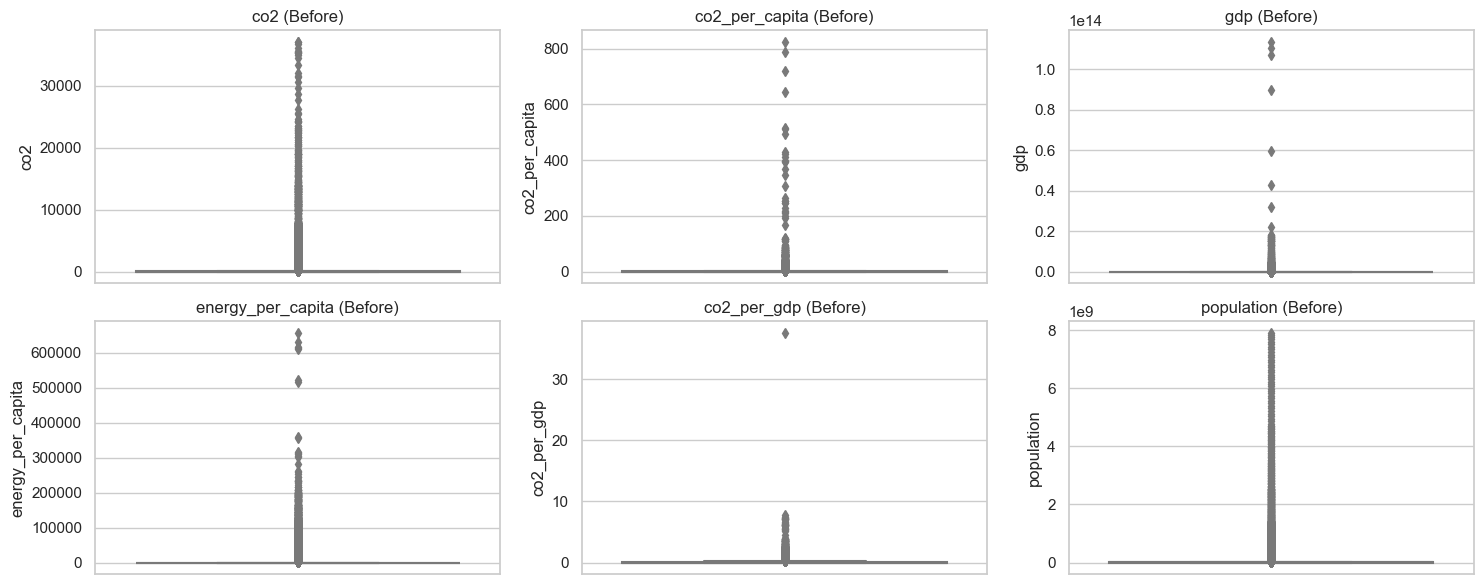

Total number of outliers across selected columns: 55121


In [4]:
cols = ['co2', 'co2_per_capita', 'gdp', 'energy_per_capita', 'co2_per_gdp', 'population']

total_outliers = 0  # Initialize counter

# 1️⃣ Plot BEFORE removing outliers
plt.figure(figsize=(15, 6))
for i, col in enumerate(cols):
    # Outlier detection
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outlier_count = ((df[col] < lower) | (df[col] > upper)).sum()
    total_outliers += outlier_count

    # Boxplot
    plt.subplot(2, len(cols)//2, i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'{col} (Before)')
plt.tight_layout()
plt.show()

print(f"Total number of outliers across selected columns: {total_outliers}")


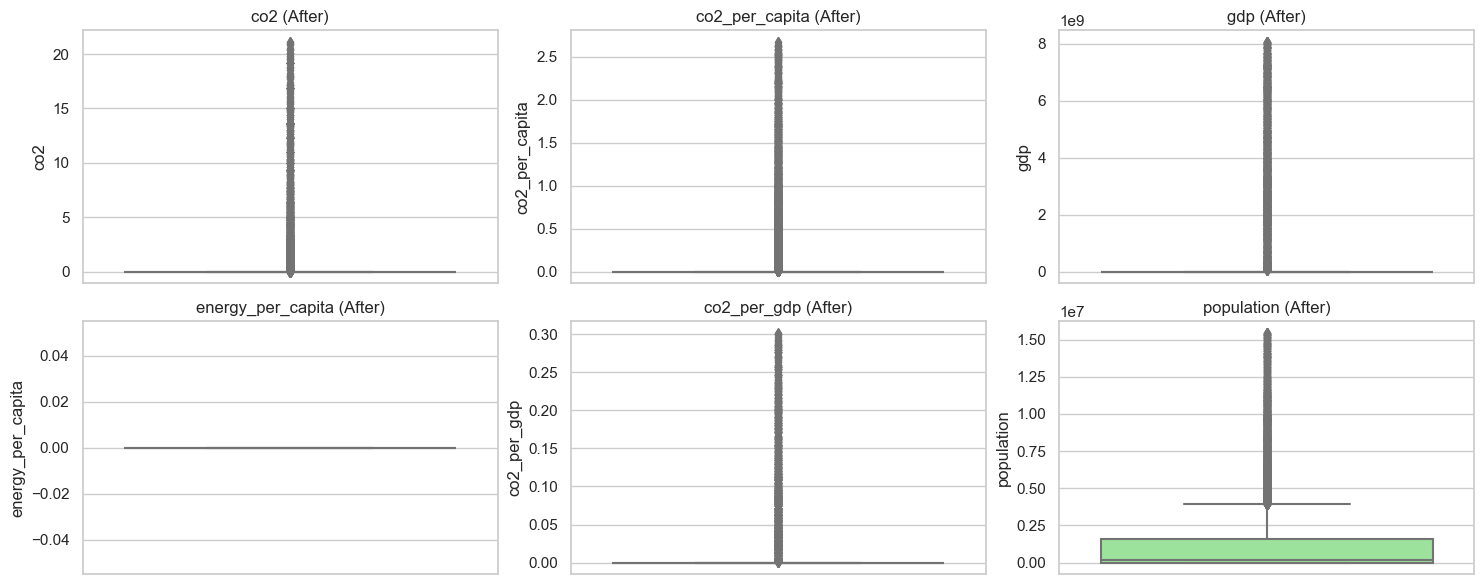

In [5]:

# 2️⃣ Remove outliers using IQR method
df_clean = df.copy()
for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]

# 3️⃣ Plot AFTER removing outliers
plt.figure(figsize=(15, 6))
for i, col in enumerate(cols):
    plt.subplot(2, len(cols)//2, i+1)
    sns.boxplot(y=df_clean[col], color='lightgreen')
    plt.title(f'{col} (After)')
plt.tight_layout()
plt.show()

       country  year  co2  gdp  co2_per_gdp
0  Afghanistan  1850  0.0  0.0          0.0
1  Afghanistan  1851  0.0  0.0          0.0
2  Afghanistan  1852  0.0  0.0          0.0
3  Afghanistan  1853  0.0  0.0          0.0
4  Afghanistan  1854  0.0  0.0          0.0


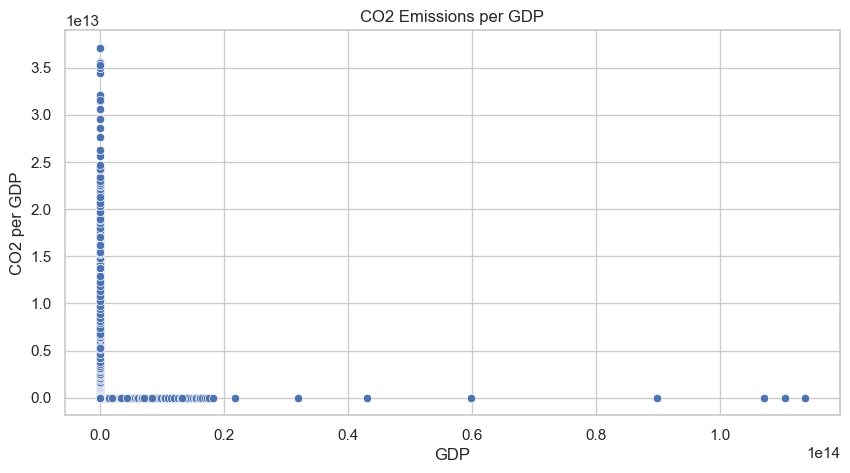

In [6]:
# Feature Engineering: CO2 per GDP
df['co2_per_gdp'] = df['co2'] / (df['gdp'] + 1e-9)  # avoid division by zero

# Quick check
print(df[['country', 'year', 'co2', 'gdp', 'co2_per_gdp']].head())

# Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='gdp', y='co2_per_gdp')
plt.title("CO2 Emissions per GDP")
plt.xlabel("GDP")
plt.ylabel("CO2 per GDP")
plt.show()


## Univariate Analysis

In [7]:
# Summary for numeric columns
print("Summary Statistics for Numeric Variables:")
print(df.describe())

# Frequency count for categorical column (top 10 countries)
print("\nTop 10 Countries by Frequency:")
print(df['country'].value_counts().head(10))


Summary Statistics for Numeric Variables:
               year    population           gdp    cement_co2  \
count  50598.000000  5.059800e+04  5.059800e+04  50598.000000   
mean    1925.365173  4.686347e+07  7.707095e+10      4.142339   
std       59.882945  2.875937e+08  1.134817e+12     44.465259   
min     1750.000000  0.000000e+00  0.000000e+00      0.000000   
25%     1882.000000  1.769975e+04  0.000000e+00      0.000000   
50%     1929.000000  9.854470e+05  0.000000e+00      0.000000   
75%     1975.000000  6.203384e+06  3.228011e+09      0.006000   
max     2021.000000  7.909295e+09  1.136302e+14   1672.592000   

       cement_co2_per_capita           co2  co2_growth_abs  co2_growth_prct  \
count           50598.000000  50598.000000    50598.000000     50598.000000   
mean                0.028712    235.583757        3.270073        10.138070   
std                 0.088352   1429.989657       44.535145       492.162773   
min                 0.000000      0.000000    -1818.4720

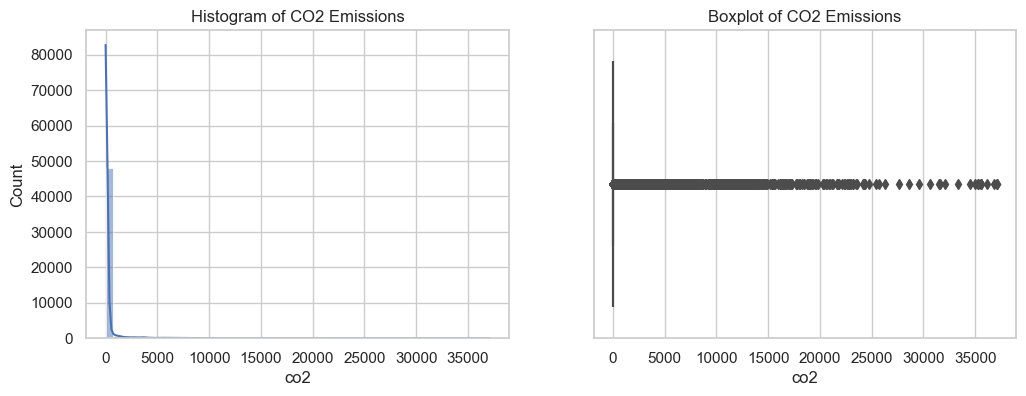

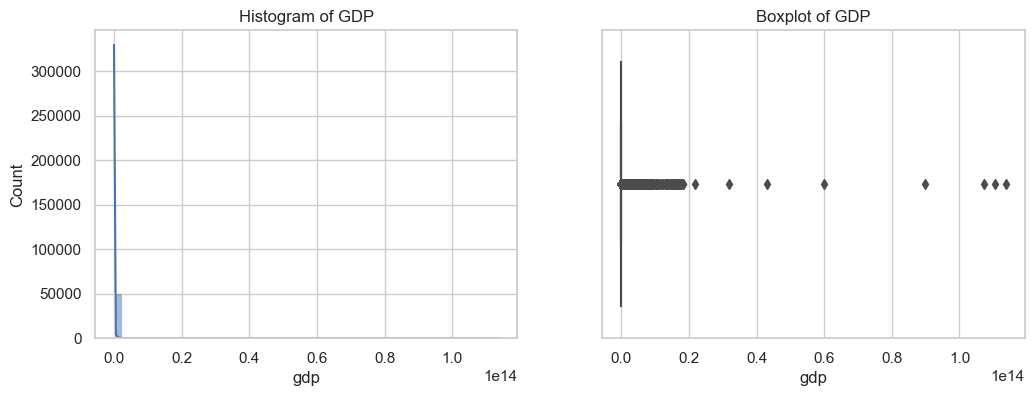

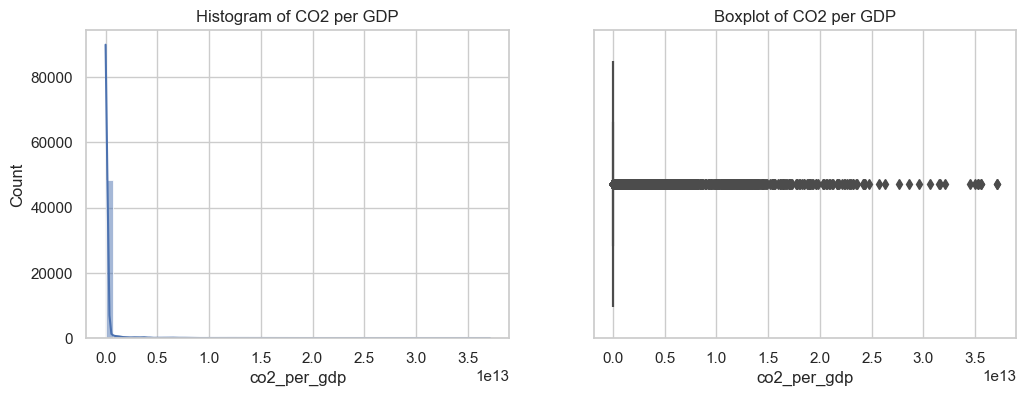

In [8]:
# Set plot style
sns.set(style='whitegrid')

# Histogram and Boxplot for 'co2'
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['co2'], bins=50, kde=True)
plt.title('Histogram of CO2 Emissions')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['co2'])
plt.title('Boxplot of CO2 Emissions')
plt.show()

# Histogram and Boxplot for 'gdp'
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['gdp'], bins=50, kde=True)
plt.title('Histogram of GDP')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['gdp'])
plt.title('Boxplot of GDP')
plt.show()

# Histogram and Boxplot for 'co2_per_gdp'
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['co2_per_gdp'], bins=50, kde=True)
plt.title('Histogram of CO2 per GDP')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['co2_per_gdp'])
plt.title('Boxplot of CO2 per GDP')
plt.show()


In [9]:
# Frequency count of 'country' (categorical column)
freq_counts = df['country'].value_counts()

# Display the top 10 most frequent categories
print("Top 10 Countries by Frequency:\n")
print(freq_counts.head(10))


Top 10 Countries by Frequency:

Lower-middle-income countries    272
Tuvalu                           272
Brunei                           272
Cambodia                         272
South America                    272
Cote d'Ivoire                    272
Iceland                          272
Singapore                        272
Sierra Leone                     272
North America                    272
Name: country, dtype: int64


## Bivariate and Multivariate Analysis

Correlation matrix:
                        co2       gdp  population  co2_per_capita  \
co2                1.000000  0.294640    0.686408        0.044665   
gdp                0.294640  1.000000    0.289196        0.038755   
population         0.686408  0.289196    1.000000        0.015281   
co2_per_capita     0.044665  0.038755    0.015281        1.000000   
energy_per_capita  0.090834  0.101840    0.041634        0.240158   

                   energy_per_capita  
co2                         0.090834  
gdp                         0.101840  
population                  0.041634  
co2_per_capita              0.240158  
energy_per_capita           1.000000  


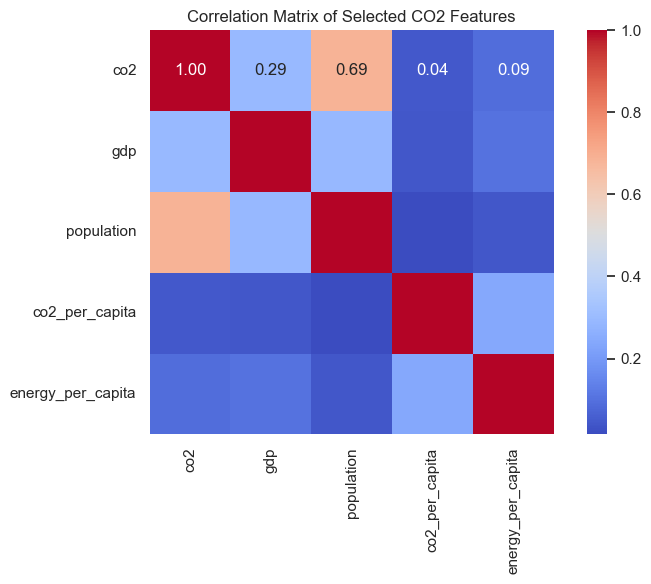

In [10]:
cols = ['co2', 'gdp', 'population', 'co2_per_capita', 'energy_per_capita']
clean_df = df[cols]

# Correlation matrix
corr = clean_df.corr()

# Print to double-check
print("Correlation matrix:")
print(corr)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix of Selected CO2 Features")
plt.tight_layout()
plt.show()


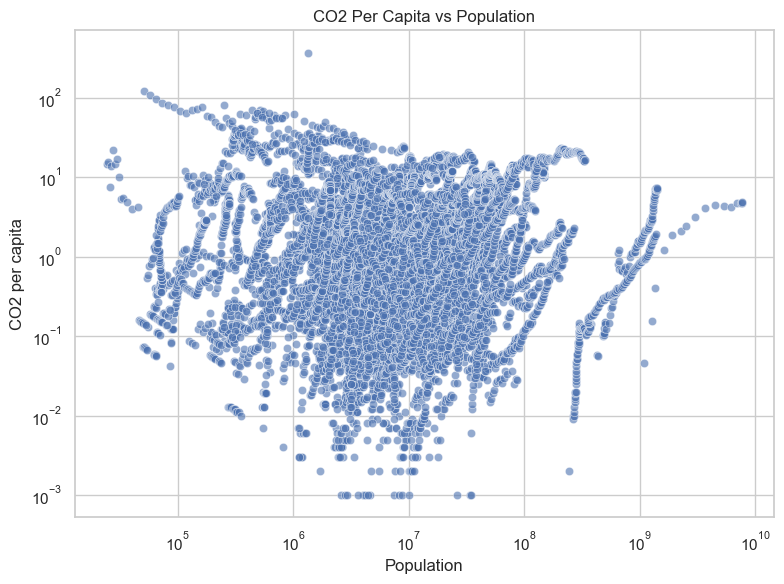

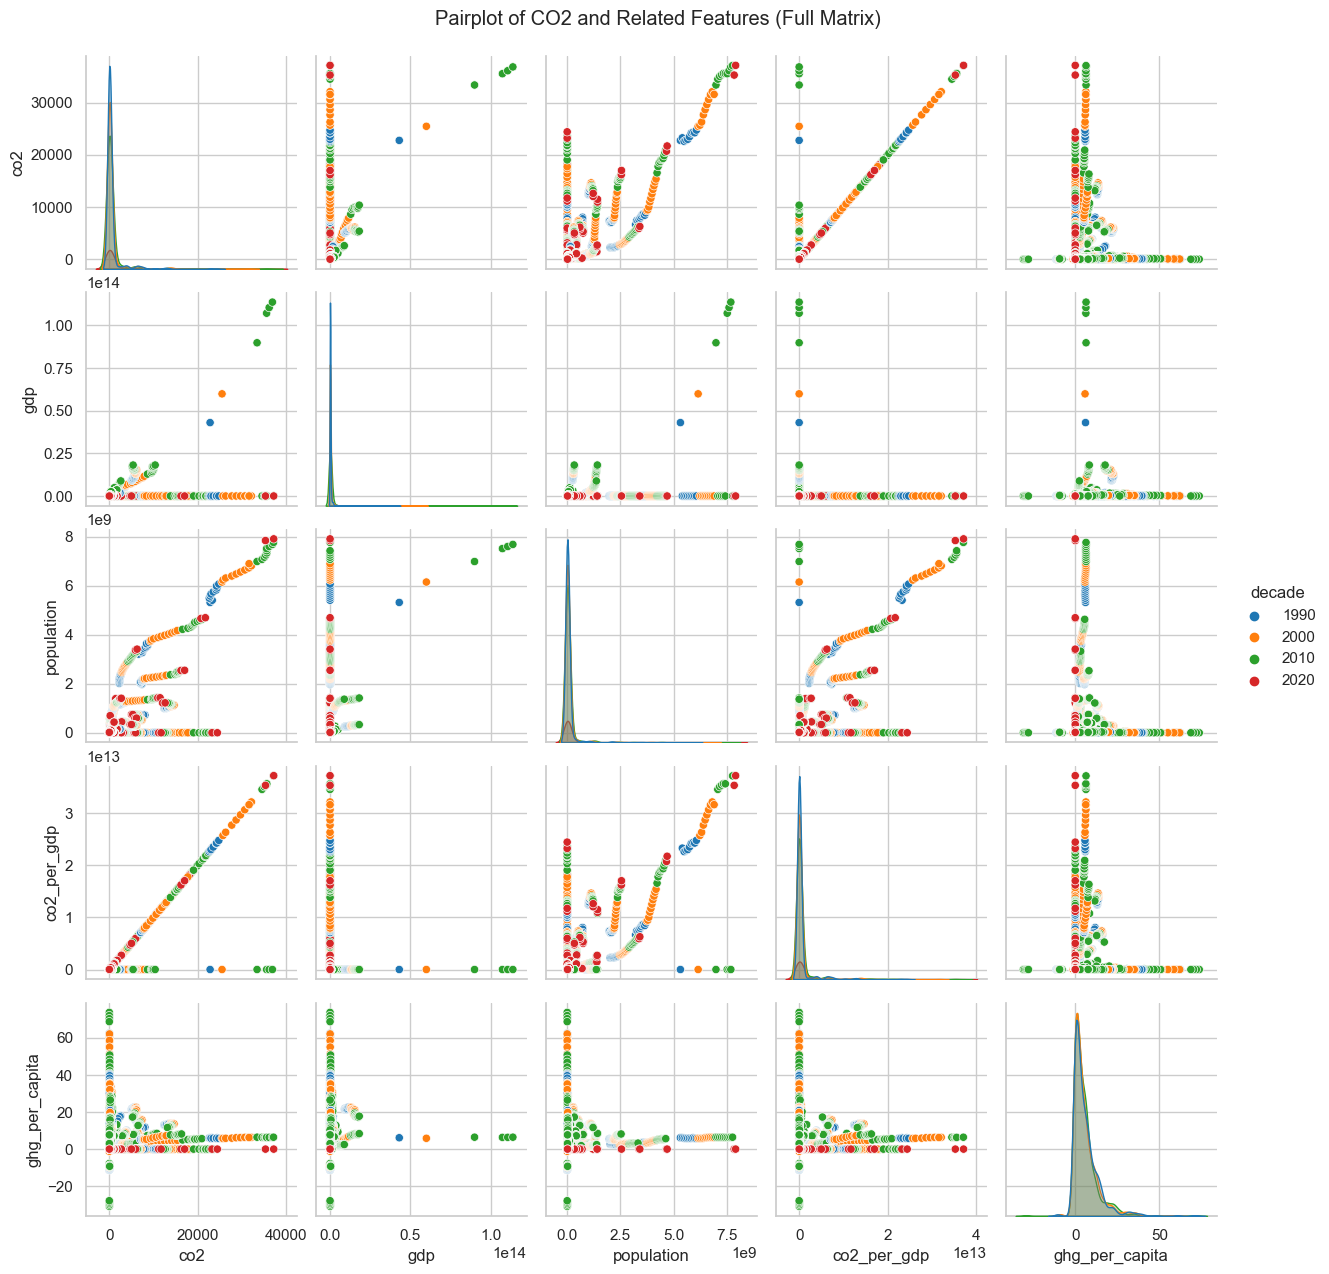

In [11]:
# Filter out rows with missing or zero values
df_filtered = df[(df['co2'] > 0) & (df['gdp'] > 0)]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_filtered, x='population', y='co2_per_capita', alpha=0.6)

plt.title('CO2 Per Capita vs Population')
plt.xlabel('Population')
plt.ylabel('CO2 per capita')
plt.xscale('log')  # Makes wide GDP range readable
plt.yscale('log')  # Same for CO2
plt.grid(True)
plt.tight_layout()
plt.show()


# Filter and prepare the data
df_filtered = df[df['year'] >= 1990].copy()
df_filtered['decade'] = (df_filtered['year'] // 10) * 10

# Drop NA and select relevant columns
cols = ['co2', 'gdp', 'population', 'co2_per_gdp', 'ghg_per_capita']
df_pp = df_filtered[cols + ['decade']].dropna()

# Plot pairplot (full matrix, with KDE on diagonal)
sns.pairplot(df_pp, hue='decade', diag_kind='kde', palette='tab10')  # ← corner removed
plt.suptitle('Pairplot of CO2 and Related Features (Full Matrix)', y=1.02)
plt.show()




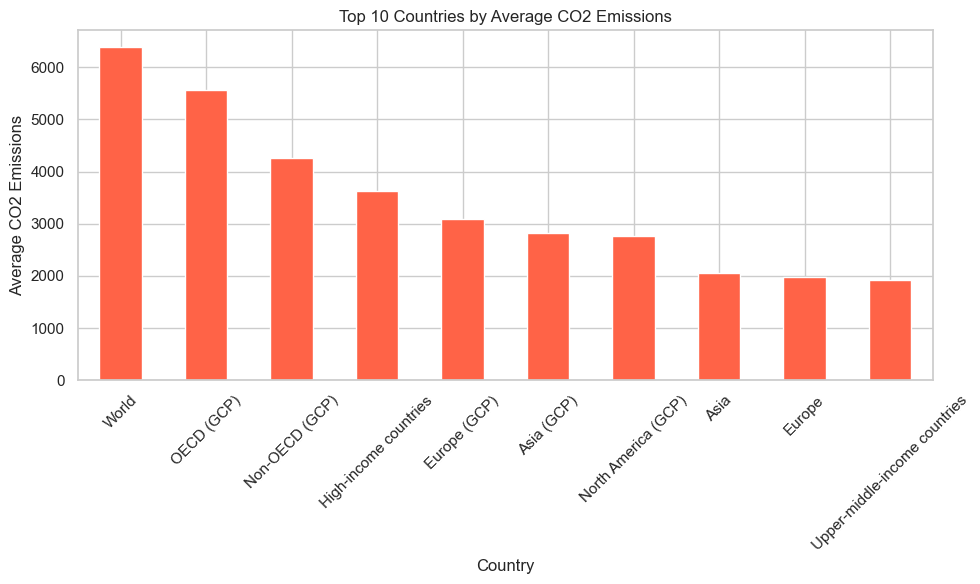

In [12]:
# Group by country and calculate mean CO2
grouped = df.groupby('country')['co2'].mean().sort_values(ascending=False).head(10)

# Plot
import matplotlib.pyplot as plt
grouped.plot(kind='bar', color='tomato', figsize=(10, 6))
plt.title('Top 10 Countries by Average CO2 Emissions')
plt.ylabel('Average CO2 Emissions')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Visualization and Insights

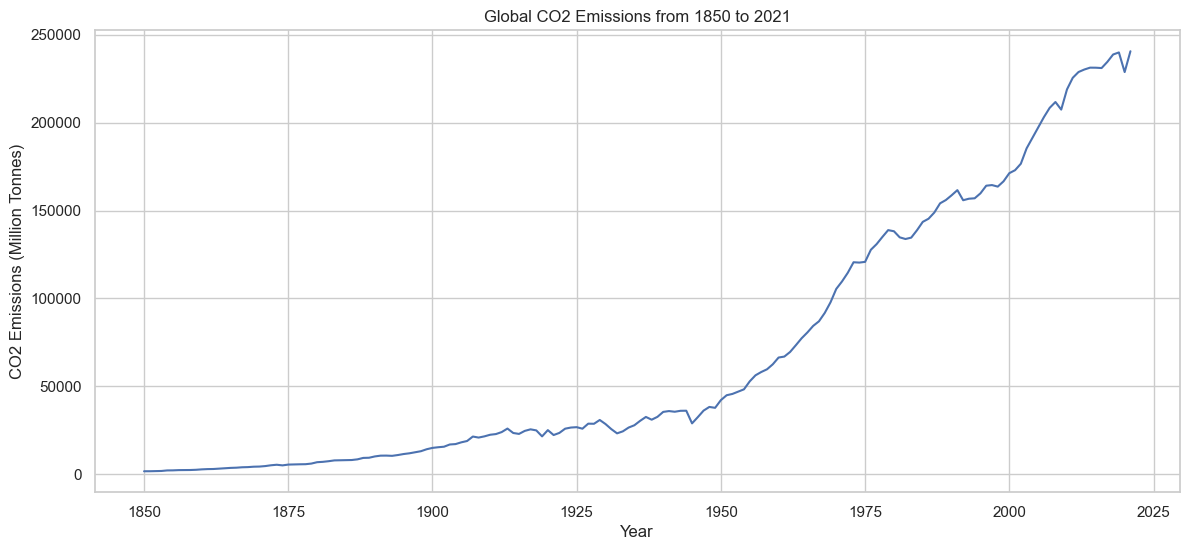

In [13]:
df_global = df[df['year'] >= 1850].groupby('year')['co2'].sum().reset_index()
plt.figure()
sns.lineplot(data=df_global, x='year', y='co2')
plt.title('Global CO2 Emissions from 1850 to 2021')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Tonnes)')
plt.grid(True)
plt.show()


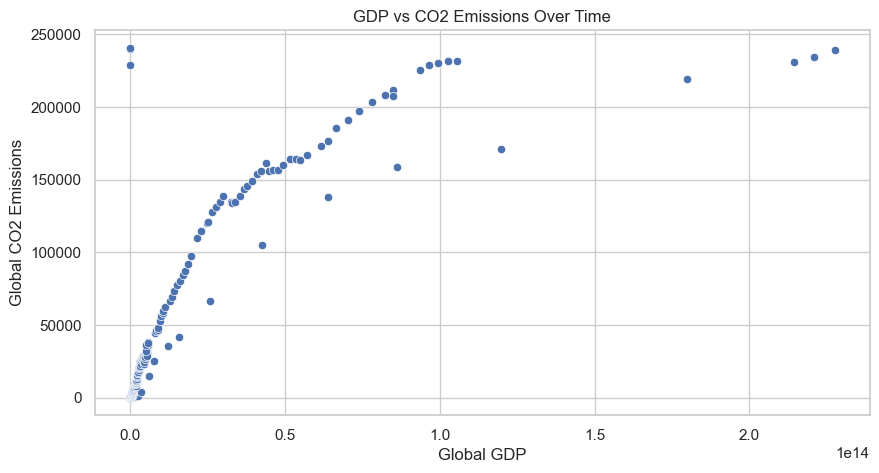

In [14]:
gdp_co2 = df.groupby('year')[['gdp', 'co2']].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=gdp_co2, x='gdp', y='co2')
plt.title('GDP vs CO2 Emissions Over Time')
plt.xlabel('Global GDP')
plt.ylabel('Global CO2 Emissions')
plt.show()


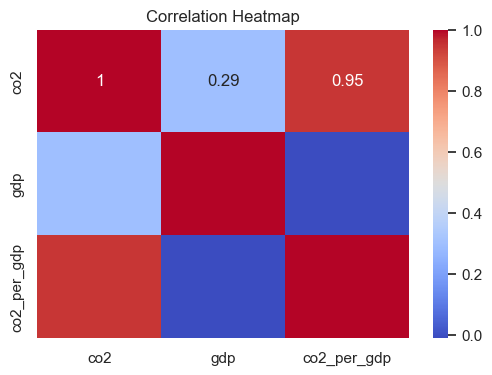

In [15]:
numeric_df = df[['co2', 'gdp', 'co2_per_gdp']].dropna()
corr = numeric_df.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


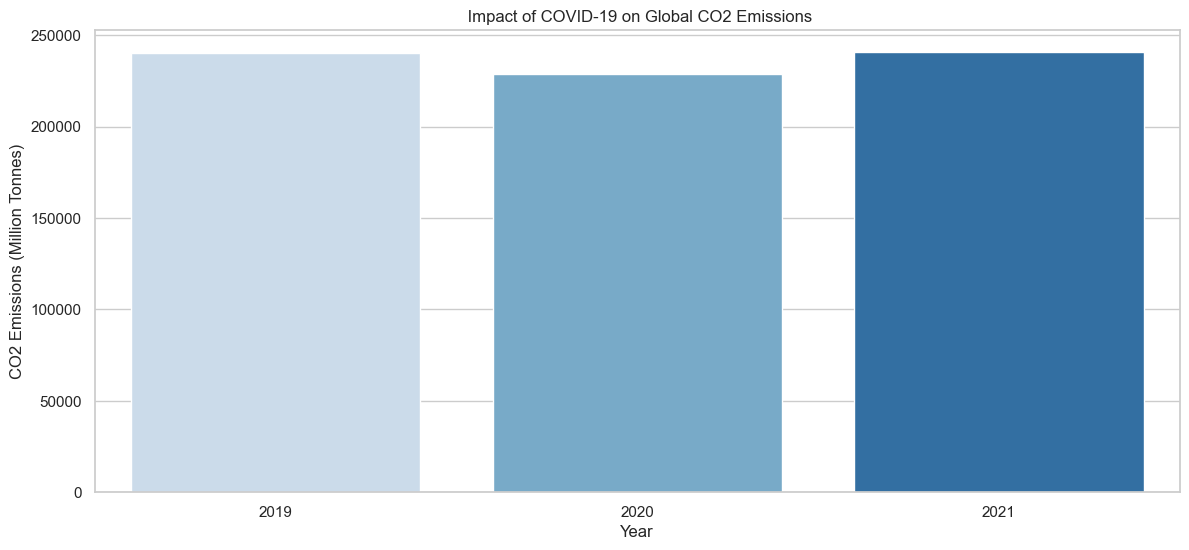

In [16]:
covid_years = df_global[df_global['year'].isin([2019, 2020, 2021])]
plt.figure()
sns.barplot(x='year', y='co2', data=covid_years, palette='Blues')
plt.title(' Impact of COVID-19 on Global CO2 Emissions')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Tonnes)')
plt.show()


In [18]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Violin(y=df['co2_per_capita'][ df['country'] == 'India' ], box_visible=True, line_color='black',
                               meanline_visible=True, fillcolor='lightseagreen', opacity=0.6,
                               x0='India'))

fig.update_layout(yaxis_zeroline=False)
fig.show()

C:\Users\shilp\AppData\Local\Temp\ipykernel_11424\1298087648.py:6: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


C:\Users\shilp\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.



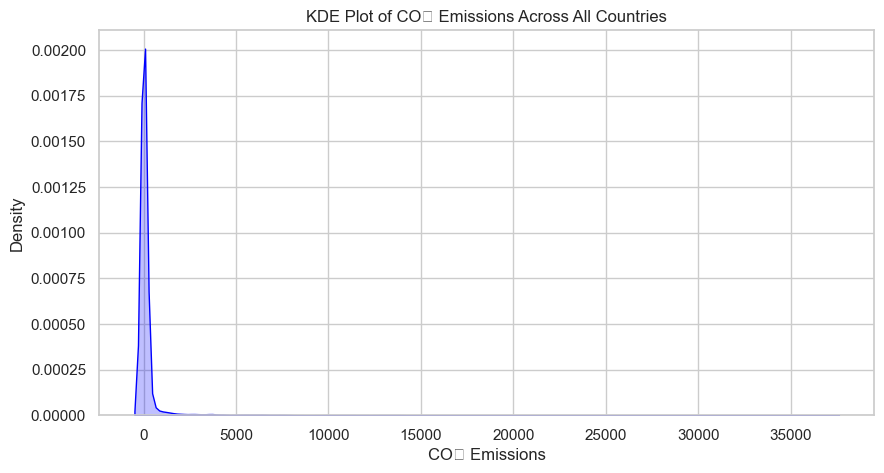

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure you're using the cleaned DataFrame `df`
plt.figure(figsize=(10, 5))
sns.kdeplot(df['co2'], shade=True, color='blue')
plt.title('KDE Plot of CO₂ Emissions Across All Countries')
plt.xlabel('CO₂ Emissions')
plt.ylabel('Density')
plt.grid(True)
plt.show()


## Simple Forecasting: Predict CO₂ Emissions for Next 5 Years

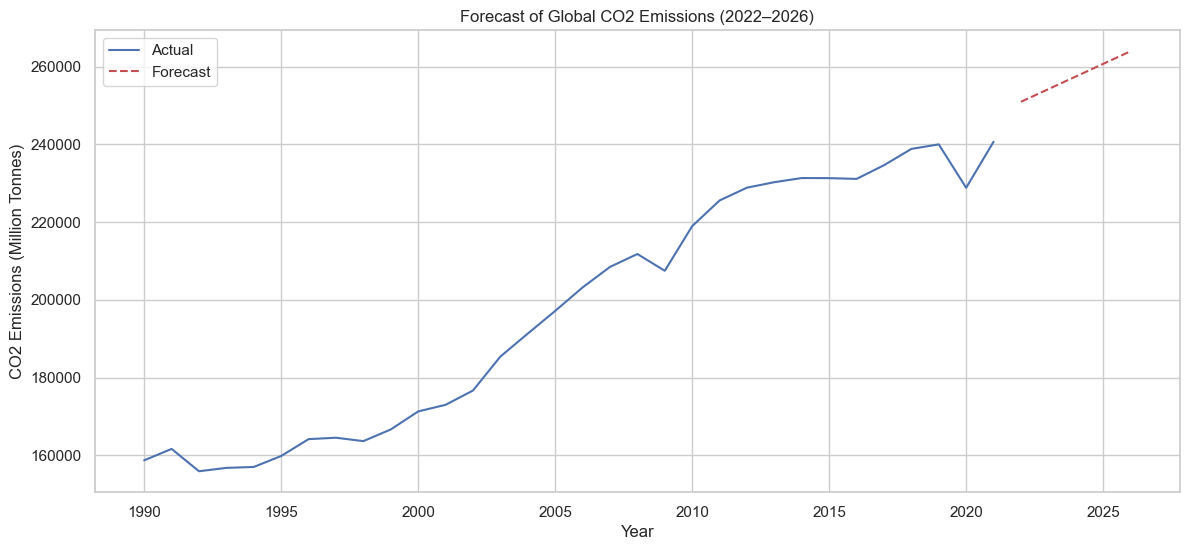

In [20]:
from sklearn.linear_model import LinearRegression

# Use data from 1990 onwards for prediction
df_forecast = df_global[df_global['year'] >= 1990].copy()

X = df_forecast['year'].values.reshape(-1,1)
y = df_forecast['co2'].values

model = LinearRegression()
model.fit(X, y)

future_years = np.arange(2022, 2027).reshape(-1,1)
predictions = model.predict(future_years)

plt.figure()
plt.plot(df_forecast['year'], y, label='Actual')
plt.plot(future_years, predictions, 'r--', label='Forecast')
plt.title('Forecast of Global CO2 Emissions (2022–2026)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (Million Tonnes)')
plt.legend()
plt.show()
